**Objetivos da aula:**

*   apresentar e aplicar template matching



**Template matching**

Até o momenos estudamos técnicas para realizar a segmentação e detecção de objetos e formas simples como circulos e retas e cores. 


Agora vamos estudar uma técnica chamada **template matching**, essa técnica realiza o casamento (matching) entre uma imagem de referência (template) com uma imagem de análise. 

Uma intuição de como essa técnica funciona é lembrar dos filtros lineares, com a função ***cv2.filter2d()***, onde um kernel convolui uma imagem. Em outras palavras a nossa template realiza um processo iterativo varrendo pixel a pixel a imagem de análise buscando a maior correlação possivel. Na OpenCV podemos utilizar a função built-in **cv2.matchTemplate()**. 


Queremos encontrar o **GOOMBA** na imagem.
<img src="mario-template.png">

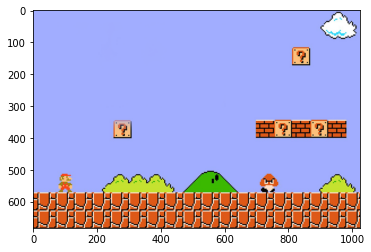

In [30]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np

# carrega a imagem analisada.
img = cv2.imread('mario.png')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb); plt.show();

(624, 965) float32


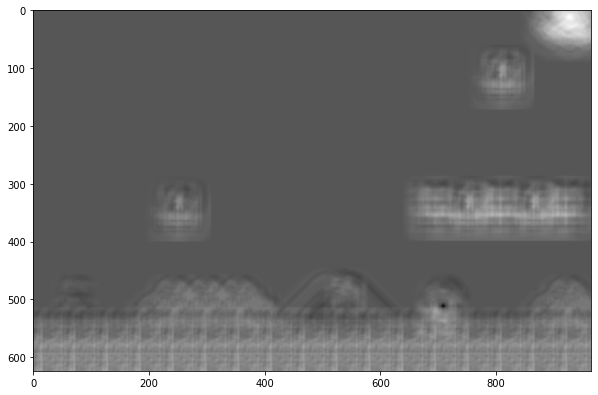

In [31]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np

# carrega as imagens.
template = cv2.imread('mario-template.png', 0)  ##template

img = cv2.imread('mario.png')  ### cena
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Aplica template Matching
res = cv2.matchTemplate(img_gray,template,cv2.TM_SQDIFF)

# res é uma imagem e podemos plotar seu shape e imagem

print(res.shape, res.dtype)


plt.figure(figsize = (10,10))
plt.imshow(res,cmap="gray");

Visualmente podemos notar que o nosso **GOOMBA** está destacado na imagem como pixel mais escuro da imagem.

Para capturar a posição deste pixel vamos usar a função da OpenCV ***`cv2.minMaxLoc()`*** que devolde o valor minimo e maximo além de suas posições 

In [32]:
#Vamos aproveitar para entender melhor o que a função devolve.

print(cv2.minMaxLoc(res))
#resultado
# (1824.0, 58356096.0, (709, 511), (927, 11))

# res é umTemos 4 valores;
# os 2 primeiros são float32, indicamos valores dos pixels com menor e maior valor
# os 2 ultimos são tuplas que indicam a posição (x,y) dos pixels com menor e maior valor 
# vamos separar cada um em uma variavel

min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)


(1824.0, 58356096.0, (709, 511), (927, 11))


## DESAFIO 1

Desenhe um retangulo como contorno sobre o GOOMBA

Dica: A função cv2.rectangle(img, pos_inicial, posição_final, color, espessura)

Temos de definir **pos_inicial e pos_final**
<img src="res.png">


In [33]:
## Implemente sua solução aqui.... 







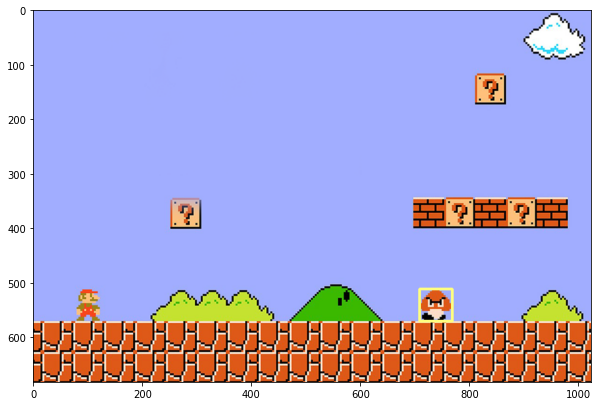

In [34]:
# Resolução
#Extrai o shape (dimensão da imagem)
largura, altura = template.shape[::-1]
 
# ajusta o bounbox da imagem lembra que é uma tupla ()
bottom_right = (min_loc[0] + largura, min_loc[1] + altura)
 
# desenha o retangulo na imagem original
cv2.rectangle(img,min_loc, bottom_right, (127,255,255), 4)

#v2.imwrite("res.png",img)

plt.figure(figsize = (10,10))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)); plt.show();

## DESAFIO 2

Na função **cv2.matchTemplate(Image, template, Metodo)** temos 3 parametros:

Utilizamos o método ***cv2.TM_SQDIFF*** no exercício acima, explore a referência da OpenCV alterando os métodos de correlação. 

Ref: https://docs.opencv.org/3.4/de/da9/tutorial_template_matching.html

In [35]:
## Implemente sua solução aqui.... 







## Queremos encontrar o **`?`** na imagem. 

<img src="mario-template2.png">

Note que neste caso temos mais de uma ocorrencia na image.A imagem final deve detectar 4 caixas. 

<img src="res2.png">

Vamos la....

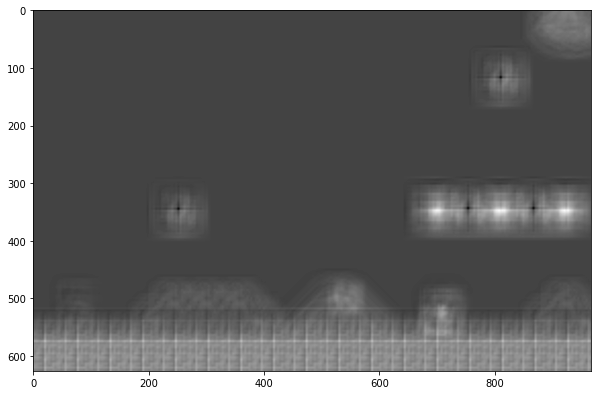

In [47]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np

# carrega as imagens.
template = cv2.imread('mario-template2.png', 0)

img = cv2.imread('mario.png')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Aplica template Matching
res = cv2.matchTemplate(img_gray,template,cv2.TM_SQDIFF_NORMED)

plt.figure(figsize = (10,10))
plt.imshow(res, cmap="gray"); plt.show();

Visualmente podemos notar que as **`Caixas ?`** estão destacadas na imagem como os pixels mais escuros da imagem.

Neste caso, onde queremos detectar mais que uma ocorrencia, a função ***cv2.minMaxLoc()*** não resolve nosso problema, pois devolve apenas uma ocorencia, não uma lista de valores.


Vamos utilizar outro metodo para capiturar esses pontos.

### Pausa na aula para dica rápida de python :)


#### np.where()

Leia a documentação oficial para conhecer a função np.where()

link: https://numpy.org/doc/stable/reference/generated/numpy.where.html


In [59]:
# Vamos entender como funciona a função np.where
# essa função faz uma busca na matriz e devolve a posição que satisfaz a condição (x,y)

# Só para entender como funciona, vamos criar uma matriz (3,3)
a = np.array([[0, 1, 5],
              [2, 2, 3],
              [0, 3, 1]])
print(a.shape)

# agora vamos busca nesta matriz os valores que são maiores ou igual a 4
b = np.where(a >= 1)

# a variavel b é uma tupla (x,y) com as posições onde a matriz a é maior ou igual a 4
print(b,type(b))

print(b[0])  ##vetor linha
print(b[1])  ###vetor coluna
print(b[::-1])

(3, 3)
(array([0, 0, 1, 1, 1, 2, 2], dtype=int64), array([1, 2, 0, 1, 2, 1, 2], dtype=int64)) <class 'tuple'>
[0 0 1 1 1 2 2]
[1 2 0 1 2 1 2]
(array([1, 2, 0, 1, 2, 1, 2], dtype=int64), array([0, 0, 1, 1, 1, 2, 2], dtype=int64))


#### zip()

já vimos na aula passada, apenas relembrando....

In [49]:
# Vamos aproveitar e entender como funciona o objeto zip
# O zip recebe 2 ou mais sequencias e cria uma tupla juntando um elemento de cada

c = 'FIAP'
d = [0,1,2,4]
zip(c,d)  # objeto zip

for pares in zip(c, d):
    print(pares)

print("...")#pular linha

#no exemplo acima b é uma tupla (x,y), para iterar precisamos descompactar a tupla, para isso usamos *.

for pt in zip(*b[::-1]):
    print(pt,pt[0],pt[1]) 

    
# Agora que entendemos, vamos voltar para o nosso problema original.

('F', 0)
('I', 1)
('A', 2)
('P', 4)
...
(1, 0) 1 0
(2, 0) 2 0
(0, 1) 0 1
(1, 1) 1 1
(2, 1) 2 1
(1, 2) 1 2
(2, 2) 2 2


### Voltando.....

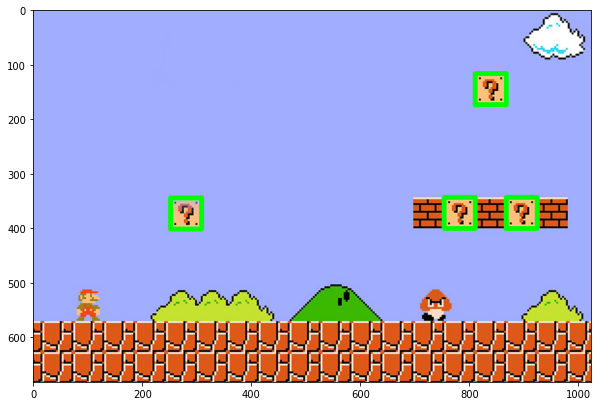

In [53]:
#Extrai o shape (dimensão da imagem)
w, h = template.shape[::-1]


#print(res) #### ajuda a definir o valor de threshold
threshold = 0.1
loc = np.where( res <= threshold)

for pt in zip(*loc[::-1]):
    cv2.rectangle(img, pt, (pt[0] + w, pt[1] + h), (0,255,0), 5)


    
    
#cv2.imwrite("res2.png",img)    
plt.figure(figsize = (10,10))
#plt.imshow(img_rgb)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)); plt.show();



## Desafio 3

Refaça o exercico acima substituindo o método ***TM_SQDIFF_NORMED*** por outro qualquer. Verifique se é necessário alterar a condição do threshold ou outro ponto qualquer do código. 



In [ ]:
#implemente sua solução aqui....





## Desafio 4

Para pensar um pouco...

    O que acontece se a template não estiver na escala do objeto que queremos detectar?

    O que acontece que a imagem estiver com um nivel de brilho ou contraste diferente da template?

    O que acontece se a imagem estiver rotacionada em relação a template?